In [23]:
path_data = '../../../assets/data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
import seaborn as sns
import pandas as pd
pd.set_option('display.max_rows', 10)
import matplotlib.pyplot as plt

In [2]:
from datascience import *
%matplotlib inline

ModuleNotFoundError: No module named 'datascience'

# Decisions and Uncertainty
We have seen several examples of assessing models that involve chance, by comparing observed data to the predictions made by the models. In all of our examples, there has been no doubt about whether the data were consistent with the model's predictions. The data were either very far away from the predictions, or very close to them.

But outcomes are not always so clear cut. How far is "far"? Exactly what does "close" mean? While these questions don't have universal answers, there are guidelines and conventions that you can follow. In this section we will describe some of them.

But first let us develop a general framework of decision making, into which all our examples will fit.

What we have developed while assessing models are some of the fundamental concepts of statistical tests of hypotheses. Using statistical tests as a way of making decisions is standard in many fields and has a standard terminology. Here is the sequence of the steps in most statistical tests, along with some terminology and examples. You will see that they are consistent with the sequence of steps we have used for assessing models.

## Step 1: The Hypotheses

All statistical tests attempt to choose between two views of the world. Specifically, the choice is between two views about how the data were generated. These two views are called *hypotheses*.

**The null hypothesis.** This is a clearly defined model about chances. It says that the data were generated at random under clearly specified assumptions about the randomness. The word "null" reinforces the idea that if the data look different from what the null hypothesis predicts, the difference is due to *nothing* but chance.

From a practical perspective, **the null hypothesis is a hypothesis under which you can simulate data.**

In the example about Mendel's model for the colors of pea plants, the null hypothesis is that the assumptions of his model are good: each plant has a 75% chance of having purple flowers, independent of all other plants. 

Under this hypothesis, we were able to simulate random samples, by using `np.random.multinomial(929, [0.75, 0.25])`. We used a sample size of 929 because that's the number of plants Mendel grew.

**The alternative hypothesis.** This says that some reason other than chance made the data differ from the predictions of the model in the null hypothesis.

In the example about Mendel's plants, the alternative hypothesis is simply that his model isn't good.

## Step 2: The Test Statistic

In order to decide between the two hypothesis, we must choose a statistic that we can use to make the decision. This is called the **test statistic**.

In the example of Mendel's plants, our statistic was the absolute difference between the sample percent and 75% which was predicted by his model.

$$
\big{\vert} \text{sample percent of purple-flowering plants} - 75 \big{\vert}
$$

To see how to make the choice in general, look at the alternative hypothesis. What values of the statistic will make you think that the alternative hypothesis is a better choice than the null? 
- If the answer is "big values," you might have a good choice of statistic. 
- So also if the answer is "small values." 
- But if the answer is "both big values and small values," we recommend that you look again at your statistic and see if taking an absolute value can change the answer to just "big values".

In the case of the pea plants, a sample percent of around 75% will be consistent with the model, but percents much bigger or much less than 75 will make you think that the model isn't good. This indicates that the statistic should be the *distance* between the sample percent and 75, that is, the absolute value of the difference between them. Big values of the distance will make you lean towards the alternative.

The **observed value of the test statistic** is the value of the statistic you get from the data in the study, not a simulated value. Among Mendel's 929 plants, 705 had purple flowers. The observed value of the test statistic was therefore

In [3]:
np.abs( 100 * (705 / 929) - 75)

0.8880516684607045

## Step 3: The Distribution of the Test Statistic, Under the Null Hypothesis

The main computational aspect of a test of hypotheses is figuring out *what the values of the test statistic might be if the null hypothesis were true*. 

The test statistic is simulated based on the assumptions of the model in the null hypothesis. That model involves chance, so the statistic comes out differently when you simulate it multiple times.

By simulating the statistic repeatedly, we get a good sense of its possible values and which ones are more likely than others. In other words, we get a good approximation to the probability distribution of the statistic, as predicted by the model in the null hypothesis.

As with all distributions, it is very useful to visualize this distribution by a histogram. We have done so in all our examples.

## Step 4. The Conclusion of the Test

The choice between the null and alternative hypotheses depends on the comparison between what you computed in Steps 2 and 3: the observed value of the test statistic and its distribution as predicted by the null hypothesis. 

If the two are consistent with each other, then the observed test statistic is in line with what the null hypothesis predicts. In other words, the test does not point towards the alternative hypothesis; the null hypothesis is better supported by the data. This was the case with the assessment of Mendel's model.

But if the two are not consistent with each other, as is the case in our example about Alameda County jury panels, then the data do not support the null hypothesis. That is why we concluded that the jury panels were not selected at random. Something other than chance affected their composition.

If the data do not support the null hypothesis, we say that the test *rejects* the null hypothesis.

## The Meaning of "Consistent"

In the example about Alameda County juries, it was apparent that our observed test statistic was far from what was predicted by the null hypothesis. In the example about pea flowers, it is just as clear that the observed statistic is consistent with the distribution that the null predicts. So in both of the examples, it is clear which hypothesis to choose.

But sometimes the decision is not so clear. Whether the observed test statistic is consistent with its predicted distribution under the null hypothesis is a matter of judgment. We recommend that you provide your judgment along with the value of the test statistic and a graph of its predicted distribution under the null. That will allow your reader to make his or her own judgment about whether the two are consistent.

Here is an example where the decision requires judgment.

## The GSI's Defense
A Berkeley Statistics class of about 350 students was divided into 12 discussion sections led by Graduate Student Instructors (GSIs). After the midterm, students in Section 3 noticed that their scores were on average lower than the rest of the class. 

In such situations, students tend to grumble about the section's GSI. Surely, they feel, there must have been something wrong with the GSI's teaching. Or else why would their section have done worse than others?

The GSI, typically more experienced about statistical variation, often has a different perspective: if you simply draw a section of students at random from the whole class, their average score could resemble the score that the students are unhappy about, just by chance.

The GSI's position is a clearly stated chance model. We can simulate data under this model. Let's test it out. 

**Null Hypothesis.** The average score of the students in Section 3 is like the average score of the same number of students picked at random from the class. 

**Alternative Hypothesis.** No, it's too low.

A natural statistic here is the average of the scores. Low values of the average will make us lean towards the alternative.

Let's take a look at the data.

The table `scores` contains the section number and midterm score for each student in the class. The midterm scores were integers in the range 0 through 25; 0 means that the student didn't take the test.

In [3]:
scores =  pd.read_csv(path_data + 'scores_by_section.csv')
scores

,Section,Midterm
0,1,22
1,2,12
2,2,23
3,2,14
4,1,20
...,...,...
354,5,24
355,2,16
356,2,17
357,12,16


To find the average score in each section, we will use `groupby`.

In [4]:
section_averages = scores.groupby('Section').mean()
section_averages

,Midterm
Section,
1,15.593750
2,15.125000
3,13.666667
4,14.766667
5,17.454545
...,...
8,16.310345
9,14.566667
10,15.235294


The average score of Section 3 is 13.667, which does look low compared to the other section averages. But is it lower than the average of a section of the same size selected at random from the class? 

To answer this, we can select a section at random from the class and find its average. To select a section at random to we need to know how big Section 3 is, which we can by once again using `groupby`.

In [5]:
scores.groupby('Section').count()

,Midterm
Section,
1,32
2,32
3,27
4,30
5,33
...,...
8,29
9,30
10,34


Section 3 had 27 students. 

Now we can figure out how to create one simulated value of our test statistic, the random sample average.

First we have to select 27 scores at random without replacement. Since the data are already in a pandas dataframe, we will use the method `sample`.

Remember that by default, `sample` draws without replacement. The optional argument `replace = False` produces a random sample drawn without replacement.

In [13]:
random_sample = scores['Midterm'].sample(27, replace=False)
random_sample

33     20
91     18
21     13
203     8
78     11
       ..
280    17
123    15
124    18
55     20
167    16
Name: Midterm, Length: 27, dtype: int64

The average of these 27 randomly selected scores is

In [14]:
np.average(random_sample)

16.185185185185187

That's the average of 27 randomly selected scores. The cell below collects the code necessary for generating this random average. 

Now we can simulate the random sample average by repeating the calculation multple times.

In [18]:
def random_sample_average():
    random_sample = scores['Midterm'].sample(27, replace=False)
    return np.average(random_sample)

In [19]:
sample_averages = np.array([])

repetitions = 10000
for i in np.arange(repetitions):
    sample_averages = np.append(sample_averages, random_sample_average())

Here is the histogram of the simulated averages. It shows the distribution of what the Section 3 average might have been, if Section 3 had been selected at random from the class. 

The observed Section 3 average score of 13.667 is shown as a red dot on the horizontal axis. You can ignore the last line of code; it just draws the dot.

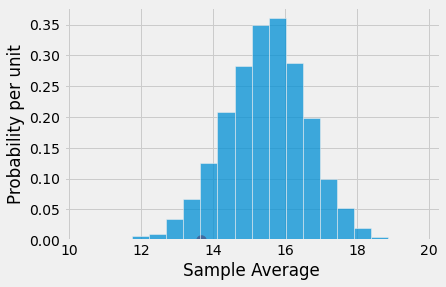

In [29]:
sns.histplot(sample_averages, bins=20, stat='density')
plt.xlabel('Sample Average')
plt.ylabel('Probability per unit')

observed_statistic = 13.667
plt.scatter(observed_statistic, 0, color='red', s=100)

As we said earlier, small values of the test statistic will make us lean towards the alternative hypothesis, that the average score in the section is too low for it to look like a random sample from the class.

Is the observed statistic of 13.667 "too low" in relation to this distribution? In other words, is the red far enough out into the left hand tail of the histogram for you to think that it is "too far"? 

It's up to you to decide! Use your judgment. Go ahead – it's OK to do so.

## Conventional Cut-offs and the P-value
If you don't want to make your own judgment, there are conventions that you can follow. These conventions tell us how far out into the tails is considered "too far". 

The conventions are based on the area in the tail, starting at the observed statistic (the red dot) and looking in the direction that makes us lean toward the alternative (the left side, in this example). If the area of the tail is small, the observed statistic is far away from the values most commonly predicted by the null hypothesis.

Remember that in a histogram, area represents probability. To find the area in the tail, we have to find the percent of sample averages that were less than or equal to the average score of Section 3, where the red dot is. The array `sample_averages` contains the averages for all 10,000 repetitions of the random sampling, and `observed_statistic` is 13.667, the average score of Section 3.

In [30]:
np.count_nonzero(sample_averages <= observed_statistic) / repetitions

0.0593

About 5.7% of the simulated random sample averages were 13.667 or below. If we had drawn the students of Section 3 at random from the whole class, the chance that their average would be 13.667 or lower is about 5.7%.

This chance has an impressive name. It is called the *observed significance level* of the test. That's a mouthful, and so it is commonly called the *P-value* of the test. 

**Definition:** The P-value of a test is the chance, based on the model in the null hypothesis, that the test statistic will be equal to the observed value in the sample or even further in the direction that supports the alternative.**

If a P-value is small, that means the tail beyond the observed statistic is small and so the observed statistic is far away from what the null predicts. This implies that the data support the alternative hypothesis better than they support the null.  

How small is "small"? According to the conventions:

- If the P-value is less than 5%, it is considered small and the result is called "statistically significant."

- If the P-value is even smaller – less than 1% – the result is called "highly statistically significant."

By this convention, our P-value of 5.7% is not considered small. So we have to conclude that the GSI's defense holds good – the average score of Section 3 is like those generated by random chance. Formally, the result of the test is not statistically significant.

When you make a conclusion in this way, we recommend that you don't just say whether or not the result is statistically significant. Along with your conclusion, provide the observed statistic and the P-value as well, so that readers can use their own judgment.

## Historical Note on the Conventions

The determination of statistical significance, as defined above, has become standard in statistical analyses in all fields of application. When a convention is so universally followed, it is interesting to examine how it arose. 

The method of statistical testing – choosing between hypotheses based on data in random samples – was developed by Sir Ronald Fisher in the early 20th century. Sir Ronald might have set the convention for statistical significance somewhat unwittingly, in the following statement in his 1925 book *Statistical Methods for Research Workers*. About the 5% level, he wrote, "It is convenient to take this point as a limit in judging whether a deviation is to be considered significant or not."

What was "convenient" for Sir Ronald became a cutoff that has acquired the status of a universal constant. No matter that Sir Ronald himself made the point that the value was his personal choice from among many: in an article in 1926, he wrote, "If one in twenty does not seem high enough odds, we may, if we prefer it draw the line at one in fifty (the 2 percent point), or one in a hundred (the 1 percent point). Personally, the author prefers to set a low standard of significance at the 5 percent point ..."

Fisher knew that "low" is a matter of judgment and has no unique definition. We suggest that you follow his excellent example. Provide your data, make your judgment, and explain why you made it.

Whether you use a conventional cutoff or your own judgment, it is important to keep the following points in mind.

- Always provide the observed value of the test statistic and the P-value, so that readers can decide whether or not they think the P-value is small.
- Don't look to defy convention only when the conventionally derived result is not to your liking.
- Even if a test concludes that the data don't support the chance model in the null hypothesis, it typically doesn't explain *why* the model doesn't work.